## DataScience Challenge 4
# _ StarCraft _
![StarCraft](sc2_guide_generaliste.jpg "StarCraft 2")

Starcraft est un jeu video de strategie en temps réel pratiqué lors de compétitions internationnales de sport électronique. 

Il permet à deux joueurs de s'affronter pour la domination militaire du territoire. Au début du jeu, chaque joueur choisit une des trois races disponibles qui ont différentes capacitées et styles de jeu. Les joueurs doivent récolter des ressources pour produire des batiments et des unitées de combat. 

![gameplay](611he05az8L.jpg "Gameplay")

** L'objectif de ce challenge est de prédire le vainqueur d'une partie de StarCraft **


## 1 - Les données

* Les données des matches ont été téléchargées sur [ggtracker](http://ggtracker.com/matches), une plateforme d’analyse statistique des replays des joueurs inscrits. 

* Les actions des joueurs ont été extraites à l’aide de l’utilitaire [sc2gears](https://github.com/icza/sc2gears). 

* Les fichiers texte ont été convertis au format csv à l’aide d’un script PowerShell. 

* Les données ont été extraites par un script Python. 

* Le jeu de données sc2_dataset_lt_5mins.csv est composé de **328** variables issues de **34534** matches joués. 

**La cible à prédire est le vainqueur du match indiqué dans la variable `_p1_win_game`.**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option("display.max_rows",250)
pd.set_option("display.max_columns",250)
#Classifiers
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF

In [3]:
 dataset = pd.read_csv("sc2_dataset_lt_5mins.csv")

#Remplacement des valeurs manquantes
non_sparse_dataset = dataset.fillna(value=0.0)

#Quelle est la taille de la DataFrame ? 
print("Le jeu de données contient %d lignes et %d colonnes" % (non_sparse_dataset.shape[0], non_sparse_dataset.shape[1]))

Le jeu de données contient 34534 lignes et 328 colonnes


In [4]:
non_sparse_dataset.head()

,_p1_win_game,game_length,p1_APM,p1_APM_wo_select,p1_Archon,p1_Armory,p1_Assimilator,p1_Auto_Turret,p1_Baneling_Nest,p1_Banshee,p1_Barracks,p1_Battlecruiser,p1_Building_Attack,p1_Bunker,p1_Carrier,p1_Colossus,p1_Command_Center,p1_Corruptor,p1_Creep_Tumor,p1_Cybernetics_Core,p1_Dark,p1_Dark_Shrine,p1_Drone,p1_Engineering_Bay,p1_Evolution_Chamber,p1_Extractor,p1_Factory,p1_Fleet_Beacon,p1_Forge,p1_Fusion_Core,p1_Gateway,p1_Ghost,p1_Ghost_Academy,p1_Hatchery,p1_Hellion,p1_High,p1_Hive,p1_Hydralisk,p1_Hydralisk_Den,p1_Immortal,p1_Infestation_Pit,p1_Infestor,p1_Lair,p1_Lair_Upgrade_Hatchery,p1_Marauder,p1_Marine,p1_Medivac,p1_Missile_Turret,p1_Mothership,p1_Mutalisk,p1_Nexus,p1_Nydus_Network,p1_Nydus_Worm,p1_Observer,p1_Orbital_Command_Upgrade_Command_Center,p1_Overlord,p1_Phoenix,p1_Photon_Cannon,p1_Planetary_Fortress_Upgrade_Command_Center,p1_Point_Defense,p1_Probe,p1_Protoss_Air_Armor_1,p1_Protoss_Air_Armor_2,p1_Protoss_Air_Armor_3,p1_Protoss_Air_Weapons_1,p1_Protoss_Air_Weapons_2,p1_Protoss_Air_Weapons_3,p1_Protoss_Ground_Armor_1,p1_Protoss_Ground_Armor_2,p1_Protoss_Ground_Armor_3,p1_Protoss_Ground_Weapons_1,p1_Protoss_Ground_Weapons_2,p1_Protoss_Ground_Weapons_3,p1_Protoss_Shield_1,p1_Protoss_Shield_2,p1_Protoss_Shield_3,p1_Pylon,p1_Queen,p1_Raven,p1_Reactor_Barracks,p1_Reactor_Factory,p1_Reactor_Starport,p1_Reaper,p1_Refinery,p1_Roach,p1_Roach_Warren,p1_Robotics_Bay,p1_Robotics_Facility,p1_SCV,p1_Sensor_Tower,p1_Sentry,p1_Siege,p1_Spawning_Pool,p1_Spine_Crawler,p1_Spire,p1_Spore_Crawler,p1_Stalker,p1_Stargate,p1_Starport,p1_Supply_Depot,p1_Tech_Lab,p1_Templar_Archives,p1_Terran_Building,p1_Terran_Building_Armor,p1_Terran_Hi-sec_Auto_Tracking,p1_Terran_Infantry_Armor_1,p1_Terran_Infantry_Armor_2,p1_Terran_Infantry_Armor_3,p1_Terran_Infantry_Weapons_1,p1_Terran_Infantry_Weapons_2,p1_Terran_Infantry_Weapons_3,p1_Terran_Neosteel_Frame,p1_Terran_Ship_Plating_1,p1_Terran_Ship_Plating_2,p1_Terran_Ship_Plating_3,p1_Terran_Ship_Weapons_1,p1_Terran_Ship_Weapons_2,p1_Terran_Ship_Weapons_3,p1_Terran_Vehicle_Plating_1,p1_Terran_Vehicle_Plating_2,p1_Terran_Vehicle_Plating_3,p1_Terran_Vehicle_Weapons_1,p1_Terran_Vehicle_Weapons_2,p1_Terran_Vehicle_Weapons_3,p1_Thor,...,p2_Infestation_Pit,p2_Infestor,p2_Lair,p2_Lair_Upgrade_Hatchery,p2_Marauder,p2_Marine,p2_Medivac,p2_Missile_Turret,p2_Mothership,p2_Mutalisk,p2_Nexus,p2_Nydus_Network,p2_Nydus_Worm,p2_Observer,p2_Orbital_Command_Upgrade_Command_Center,p2_Overlord,p2_Phoenix,p2_Photon_Cannon,p2_Planetary_Fortress_Upgrade_Command_Center,p2_Point_Defense,p2_Probe,p2_Protoss_Air_Armor_1,p2_Protoss_Air_Armor_2,p2_Protoss_Air_Armor_3,p2_Protoss_Air_Weapons_1,p2_Protoss_Air_Weapons_2,p2_Protoss_Air_Weapons_3,p2_Protoss_Ground_Armor_1,p2_Protoss_Ground_Armor_2,p2_Protoss_Ground_Armor_3,p2_Protoss_Ground_Weapons_1,p2_Protoss_Ground_Weapons_2,p2_Protoss_Ground_Weapons_3,p2_Protoss_Shield_1,p2_Protoss_Shield_2,p2_Protoss_Shield_3,p2_Pylon,p2_Queen,p2_Raven,p2_Reactor_Barracks,p2_Reactor_Factory,p2_Reactor_Starport,p2_Reaper,p2_Refinery,p2_Roach,p2_Roach_Warren,p2_Robotics_Bay,p2_Robotics_Facility,p2_SCV,p2_Sensor_Tower,p2_Sentry,p2_Siege,p2_Spawning_Pool,p2_Spine_Crawler,p2_Spire,p2_Spore_Crawler,p2_Stalker,p2_Stargate,p2_Starport,p2_Supply_Depot,p2_Tech_Lab,p2_Templar_Archives,p2_Terran_Building,p2_Terran_Building_Armor,p2_Terran_Hi-sec_Auto_Tracking,p2_Terran_Infantry_Armor_1,p2_Terran_Infantry_Armor_2,p2_Terran_Infantry_Armor_3,p2_Terran_Infantry_Weapons_1,p2_Terran_Infantry_Weapons_2,p2_Terran_Infantry_Weapons_3,p2_Terran_Neosteel_Frame,p2_Terran_Ship_Plating_1,p2_Terran_Ship_Plating_2,p2_Terran_Ship_Plating_3,p2_Terran_Ship_Weapons_1,p2_Terran_Ship_Weapons_2,p2_Terran_Ship_Weapons_3,p2_Terran_Vehicle_Plating_1,p2_Terran_Vehicle_Plating_2,p2_Terran_Vehicle_Plating_3,p2_Terran_Vehicle_Weapons_1,p2_Terran_Vehicle_Weapons_2,p2_Terran_Vehicle_Weapons_3,p2_Thor,p2_Twilight_Council,p2_Ultralisk,p2_Ultralisk_Cavern,p2_Viking,p2_Void,p2_Warp,p2_Zealot,p2_Zerg_Flyer_Attacks_1,p2_Zerg_Flyer_Attacks_2,p2_Zerg_

`APM` : Actions par minutes. Plus cette variable est élevée et plus le joueur est expérimenté. 

In [1]:
%%HTML
<video width="640" height="480" controls>
    <source src="Jaedong_APM.mp4" type="video/mp4">
</video>

## 2 - Feature engineering

Nous voulons comparer les actions des deux joueurs pour prédire la victoire ou la défaite du joueur 1. Nous allons donc créer des variables qui quantifient les différences entre les deux joueurs. Les variables de chaque joueurs sont identifiées avec les indicateurs `p1_` et  `p2_`.


In [5]:
#la cible et la durée du match sont exclues du dataset
df = non_sparse_dataset.iloc[:,2:]

#Les noms des variables sans leurs indicateurs de joueurs sont collectés
#collecte de noms
colnames = df.columns.values
#noms uniques suffixé par '$'
colnames = list(set([n[2:]+'$' for n in colnames]))
colnames.sort()

#Création des variables correspondants à la différence entre p1_ et p2_
select_df = pd.DataFrame()
for name in colnames:
    filt_df = df.filter(regex=name)
    #nom de colonne sans l'expression regulière de fin de mot '$'
    select_df[name[:-1]] = filt_df.iloc[:,0] - filt_df.iloc[:,1]


In [6]:
# La nouvelle DataFrame est la différence entre les variable _p1 et _p2
select_df.head()

,_APM,_APM_wo_select,_Archon,_Armory,_Assimilator,_Auto_Turret,_Baneling_Nest,_Banshee,_Barracks,_Battlecruiser,_Building_Attack,_Bunker,_Carrier,_Colossus,_Command_Center,_Corruptor,_Creep_Tumor,_Cybernetics_Core,_Dark,_Dark_Shrine,_Drone,_Engineering_Bay,_Evolution_Chamber,_Extractor,_Factory,_Fleet_Beacon,_Forge,_Fusion_Core,_Gateway,_Ghost,_Ghost_Academy,_Hatchery,_Hellion,_High,_Hive,_Hydralisk,_Hydralisk_Den,_Immortal,_Infestation_Pit,_Infestor,_Lair,_Lair_Upgrade_Hatchery,_Marauder,_Marine,_Medivac,_Missile_Turret,_Mothership,_Mutalisk,_Nexus,_Nydus_Network,_Nydus_Worm,_Observer,_Orbital_Command_Upgrade_Command_Center,_Overlord,_Phoenix,_Photon_Cannon,_Planetary_Fortress_Upgrade_Command_Center,_Point_Defense,_Probe,_Protoss_Air_Armor_1,_Protoss_Air_Armor_2,_Protoss_Air_Armor_3,_Protoss_Air_Weapons_1,_Protoss_Air_Weapons_2,_Protoss_Air_Weapons_3,_Protoss_Ground_Armor_1,_Protoss_Ground_Armor_2,_Protoss_Ground_Armor_3,_Protoss_Ground_Weapons_1,_Protoss_Ground_Weapons_2,_Protoss_Ground_Weapons_3,_Protoss_Shield_1,_Protoss_Shield_2,_Protoss_Shield_3,_Pylon,_Queen,_Raven,_Reactor_Barracks,_Reactor_Factory,_Reactor_Starport,_Reaper,_Refinery,_Roach,_Roach_Warren,_Robotics_Bay,_Robotics_Facility,_SCV,_Sensor_Tower,_Sentry,_Siege,_Spawning_Pool,_Spine_Crawler,_Spire,_Spore_Crawler,_Stalker,_Stargate,_Starport,_Supply_Depot,_Tech_Lab,_Templar_Archives,_Terran_Building,_Terran_Building_Armor,_Terran_Hi-sec_Auto_Tracking,_Terran_Infantry_Armor_1,_Terran_Infantry_Armor_2,_Terran_Infantry_Armor_3,_Terran_Infantry_Weapons_1,_Terran_Infantry_Weapons_2,_Terran_Infantry_Weapons_3,_Terran_Neosteel_Frame,_Terran_Ship_Plating_1,_Terran_Ship_Plating_2,_Terran_Ship_Plating_3,_Terran_Ship_Weapons_1,_Terran_Ship_Weapons_2,_Terran_Ship_Weapons_3,_Terran_Vehicle_Plating_1,_Terran_Vehicle_Plating_2,_Terran_Vehicle_Plating_3,_Terran_Vehicle_Weapons_1,_Terran_Vehicle_Weapons_2,_Terran_Vehicle_Weapons_3,_Thor,_Twilight_Council,_Ultralisk,_Ultralisk_Cavern,_Viking,_Void,_Warp,_Zealot,_Zerg_Flyer_Attacks_1,_Zerg_Flyer_Attacks_2,_Zerg_Flyer_Attacks_3,_Zerg_Flyer_Carapace_1,_Zerg_Flyer_Carapace_2,_Zerg_Flyer_Carapace_3,_Zerg_Ground_Carapace_1,_Zerg_Ground_Carapace_2,_Zerg_Ground_Carapace_3,_Zerg_Melee_Attacks_1,_Zerg_Melee_Attacks_2,_Zerg_Melee_Attacks_3,_Zerg_Missile_Attacks_1,_Zerg_Missile_Attacks_2,_Zerg_Missile_Attacks_3,_Zergling,_an,_assigned_hotkeys,_building_types,_collected_gas,_collected_minerals,_max_distance_from_opponent,_mean_distance_from_opponent,_min_distance_from_opponent,_nb_scooting,_selected_hotkeys,_spent_gas,_spent_minerals,_timing_1st_scooting,_to_Orbital_Command_Command_Center,_to_Planetary_Fortress_Command_Center,_to_Warp_Gate_Gateway,_unit_types
0,-52.514968,-24.194918,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.0,0.0,-21,1,-98.407317,3178.767457,8.921409,13.573083,2.755987,-25,-396,1025,2725,-41.638376,0.0,0.0,0.0,0
1,47.431682,13.239911,0.0,-2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,127.0,-2.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,5.0,-6.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,2.0,0.0,-12.0,-119.0,-4.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,-4.0,0.0,-2.0,0.0,-6.0,9.0,1.0,0.0,0.0,-72.0,0.0,0.0,-19.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-20.0,-9.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,

## 3 - Normalisation

Certains classifieurs utilisent une mesure de distance entre deux points. Si des variables indépendantes ne sont pas ramenées à des domaines de variation similaires, les distances entre les points seront gouvernées par les variables ayant le plus large domaine de variation. 

On procède donc a une normalisation. Parmi les différentes méthodes, la standardisation ramène chaque variables à une moyenne de zero et une déviation standard de un:

$$x' = \frac{x-\overline x}{\sigma}$$


In [7]:
#Normalisation avec StandardScaler
stdsc = StandardScaler()
#Calcul et transformation 
scaled_mat = stdsc.fit_transform(select_df)
#la matrice est transformée en DataFrame
scaled_df = pd.DataFrame(scaled_mat, columns=select_df.columns.values)
scaled_df.describe()

,_APM,_APM_wo_select,_Archon,_Armory,_Assimilator,_Auto_Turret,_Baneling_Nest,_Banshee,_Barracks,_Battlecruiser,_Building_Attack,_Bunker,_Carrier,_Colossus,_Command_Center,_Corruptor,_Creep_Tumor,_Cybernetics_Core,_Dark,_Dark_Shrine,_Drone,_Engineering_Bay,_Evolution_Chamber,_Extractor,_Factory,_Fleet_Beacon,_Forge,_Fusion_Core,_Gateway,_Ghost,_Ghost_Academy,_Hatchery,_Hellion,_High,_Hive,_Hydralisk,_Hydralisk_Den,_Immortal,_Infestation_Pit,_Infestor,_Lair,_Lair_Upgrade_Hatchery,_Marauder,_Marine,_Medivac,_Missile_Turret,_Mothership,_Mutalisk,_Nexus,_Nydus_Network,_Nydus_Worm,_Observer,_Orbital_Command_Upgrade_Command_Center,_Overlord,_Phoenix,_Photon_Cannon,_Planetary_Fortress_Upgrade_Command_Center,_Point_Defense,_Probe,_Protoss_Air_Armor_1,_Protoss_Air_Armor_2,_Protoss_Air_Armor_3,_Protoss_Air_Weapons_1,_Protoss_Air_Weapons_2,_Protoss_Air_Weapons_3,_Protoss_Ground_Armor_1,_Protoss_Ground_Armor_2,_Protoss_Ground_Armor_3,_Protoss_Ground_Weapons_1,_Protoss_Ground_Weapons_2,_Protoss_Ground_Weapons_3,_Protoss_Shield_1,_Protoss_Shield_2,_Protoss_Shield_3,_Pylon,_Queen,_Raven,_Reactor_Barracks,_Reactor_Factory,_Reactor_Starport,_Reaper,_Refinery,_Roach,_Roach_Warren,_Robotics_Bay,_Robotics_Facility,_SCV,_Sensor_Tower,_Sentry,_Siege,_Spawning_Pool,_Spine_Crawler,_Spire,_Spore_Crawler,_Stalker,_Stargate,_Starport,_Supply_Depot,_Tech_Lab,_Templar_Archives,_Terran_Building,_Terran_Building_Armor,_Terran_Hi-sec_Auto_Tracking,_Terran_Infantry_Armor_1,_Terran_Infantry_Armor_2,_Terran_Infantry_Armor_3,_Terran_Infantry_Weapons_1,_Terran_Infantry_Weapons_2,_Terran_Infantry_Weapons_3,_Terran_Neosteel_Frame,_Terran_Ship_Plating_1,_Terran_Ship_Plating_2,_Terran_Ship_Plating_3,_Terran_Ship_Weapons_1,_Terran_Ship_Weapons_2,_Terran_Ship_Weapons_3,_Terran_Vehicle_Plating_1,_Terran_Vehicle_Plating_2,_Terran_Vehicle_Plating_3,_Terran_Vehicle_Weapons_1,_Terran_Vehicle_Weapons_2,_Terran_Vehicle_Weapons_3,_Thor,_Twilight_Council,_Ultralisk,_Ultralisk_Cavern,_Viking,_Void,_Warp,_Zealot,_Zerg_Flyer_Attacks_1,_Zerg_Flyer_Attacks_2,_Zerg_Flyer_Attacks_3,_Zerg_Flyer_Carapace_1,_Zerg_Flyer_Carapace_2,_Zerg_Flyer_Carapace_3,_Zerg_Ground_Carapace_1,_Zerg_Ground_Carapace_2,_Zerg_Ground_Carapace_3,_Zerg_Melee_Attacks_1,_Zerg_Melee_Attacks_2,_Zerg_Melee_Attacks_3,_Zerg_Missile_Attacks_1,_Zerg_Missile_Attacks_2,_Zerg_Missile_Attacks_3,_Zergling,_an,_assigned_hotkeys,_building_types,_collected_gas,_collected_minerals,_max_distance_from_opponent,_mean_distance_from_opponent,_min_distance_from_opponent,_nb_scooting,_selected_hotkeys,_spent_gas,_spent_minerals,_timing_1st_scooting,_to_Orbital_Command_Command_Center,_to_Planetary_Fortress_Command_Center,_to_Warp_Gate_Gateway,_unit_types
count,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3.453400e+04,3

## 4 - Sélection de variables

Les variables qui varient peu n'apportent pas beaucoup d'informations a un model de classification. Elle peuvent donc être retirées du jeu de donnée.



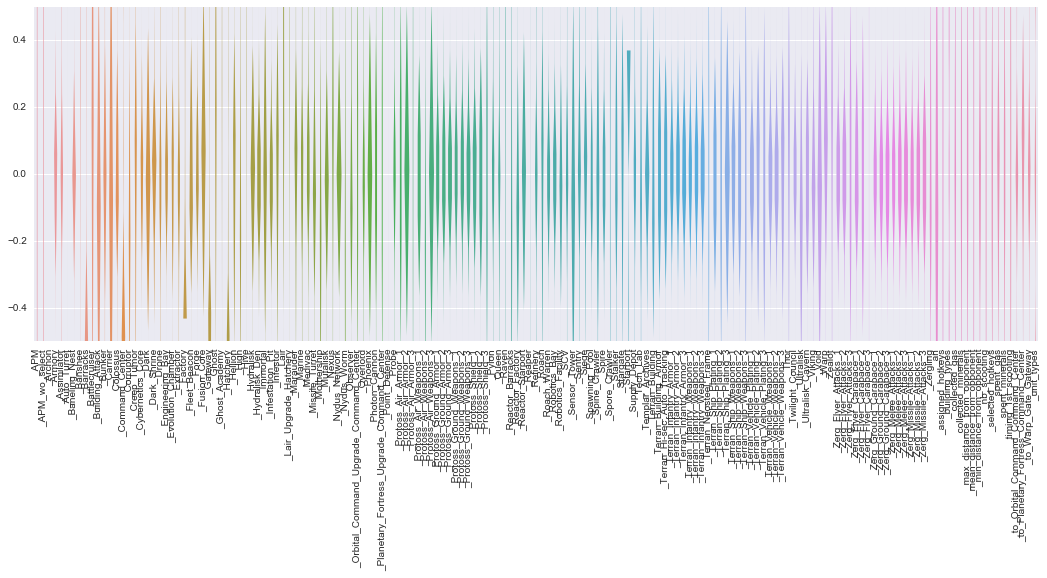

In [8]:
plt.figure(figsize=(18, 6))
g = sns.violinplot(data=scaled_df, cut=0, inner=None, linewidth=0)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylim(-.5,.5)
plt.show()

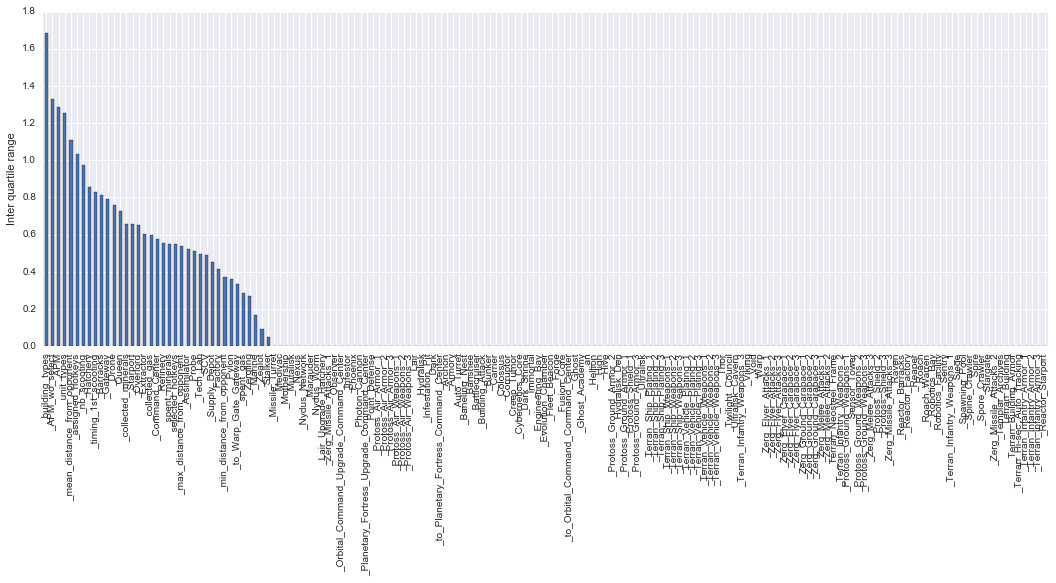

In [9]:
# On utilise la valeur d'inter-quartile pour classer les variables
inter_quantile_range = scaled_df.quantile(q=.75) - scaled_df.quantile(q=.25)
inter_quantile_range.sort_values(inplace=True, ascending=False)
plt.figure(figsize=(18, 6))
inter_quantile_range.plot.bar()
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel("Inter quartile range")
plt.show()

In [10]:
# Les variable à garder
selected_cols = inter_quantile_range.ix[inter_quantile_range > 0.05].index.values
inter_quantile_range.ix[inter_quantile_range > 0.05]

_building_types                 1.682335
_APM_wo_select                  1.328709
_APM                            1.287118
_unit_types                     1.255877
_mean_distance_from_opponent    1.107298
_assigned_hotkeys               1.033044
_nb_scooting                    0.973151
_Hatchery                       0.856653
_timing_1st_scooting            0.827457
_Barracks                       0.815745
_Gateway                        0.793692
_Drone                          0.757077
_Queen                          0.725377
_collected_minerals             0.659139
_Starport                       0.658750
_Overlord                       0.651438
_Extractor                      0.605350
_collected_gas                  0.596251
_Command_Center                 0.575615
_Refinery                       0.555060
_spent_minerals                 0.550759
_selected_hotkeys               0.549403
_max_distance_from_opponent     0.539848
_Assimilator                    0.522202
_Probe          

In [11]:
#on peu retirer l'une des variable APM qui sont colinéaires
selected_cols_wo_APM = np.delete(selected_cols,[1])
scaled_df[selected_cols_wo_APM].head()

,_building_types,_APM,_unit_types,_mean_distance_from_opponent,_assigned_hotkeys,_nb_scooting,_Hatchery,_timing_1st_scooting,_Barracks,_Gateway,_Drone,_Queen,_collected_minerals,_Starport,_Overlord,_Extractor,_collected_gas,_Command_Center,_Refinery,_spent_minerals,_selected_hotkeys,_max_distance_from_opponent,_Assimilator,_Probe,_Tech_Lab,_SCV,_Supply_Depot,_Factory,_min_distance_from_opponent,_Pylon,_to_Warp_Gate_Gateway,_spent_gas,_Zergling,_Marine,_Zealot,_Stalker
0,0.423799,-0.635114,0.014510,0.665350,-0.989986,-0.277621,-0.127739,-0.280330,-0.517529,-0.483044,0.146158,-0.741285,0.243117,0.368728,-0.077470,0.181578,-0.043425,-0.469056,0.004275,0.193832,-0.850767,0.551353,0.006253,0.005487,0.008737,0.006949,0.009217,-0.432071,0.183130,0.006680,0.010445,0.115029,-0.062560,0.010750,0.014432,0.025240
1,-0.837952,0.570615,-0.613428,-0.071180,0.418711,-0.100684,1.585567,-0.326200,-0.517529,-0.483044,2.071768,1.193055,0.531898,0.368728,1.876845,1.594061,0.151059,-0.469056,-1.660905,-0.463885,-0.377729,-0.187056,0.006253,0.005487,-2.218813,-1.754469,-1.805423,-0.432071,0.240676,0.006680,0.010445,-0.208815,1.952977,-1.645258,0.014432,0.025240
2,2.106134,-1.875468,0.642449,0.571021,-0.050855,-1.295006,-0.127739,-2.099408,-0.517529,-0.483044,0.541155,-0.015908,0.210391,0.368728,0.218639,0.383361,-0.152251,-0.469056,0.004275,-0.107888,-0.006511,0.121921,-0.777050,-0.740499,0.008737,0.006949,0.009217,-0.432071,0.172301,-0.645593,-0.326050,0.003023,0.049415,0.010750,-0.313492,-1.008933
3,0.423799,1.650061,2.526264,-1.761030,0.043058,0.264248,-0.556065,0.781603,-0.517529,-0.086197,-0.018424,-0.015908,-0.154457,0.368728,-0.018248,-0.020205,0.465143,-0.469056,0.004275,-0.150991,-0.171968,-0.131603,0.528454,0.798098,0.008737,-1.167330,-1.079567,-0.432071,-7.219366,0.586478,0.683436,0.222166,-0.017770,-0.865960,0.061278,1.162831
4,0.844383,-0.382045,1.270387,-2.166649,-0.003898,0.684472,0.300588,-3.155608,-0.517529,-0.483044,0.820944,1.676639,-0.293483,0.368728,0.810855,1.190494,-0.374660,-0.469056,0.004275,-0.044032,0.018944,0.007768,-1.560353,-1.066868,0.008737,0.006949,0.009217,-0.432071,0.093382,-0.718068,0.010445,-0.104114,0.049415,0.010750,-0.500877,-0.491846


## 5 - Model selection
### a - Protocole de Cross-Validation

In [17]:
from sklearn.cross_validation import KFold

# Les données
y = non_sparse_dataset._p1_win_game.as_matrix()
X = scaled_df[selected_cols_wo_APM].as_matrix()

def run_cv(X,y,clf_class,**kwargs):
    # Construction d'un objet Kfolds
    kf = KFold(len(y),n_folds=10,shuffle=True)
    y_pred = y.copy()
    
    # Entrainement de l'algo sur chaque fold
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Le classifier est initialisé avec un mot clé
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

### b - Evaluation des modèles de classification

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

In [19]:
print "Logistic Regression:"
print "%.3f" % np.mean(accuracy_score(y, run_cv(X,y,LR)))
print "Gradient Boosting Classifier"
print "%.3f" % np.mean(accuracy_score(y, run_cv(X,y,GBC)))
print "Support vector machines:"
print "%.3f" % np.mean(accuracy_score(y, run_cv(X,y,SVC)))
print "Random forest:"
print "%.3f" % np.mean(accuracy_score(y, run_cv(X,y,RF)))
print "K-nearest-neighbors:"
print "%.3f" % np.mean(accuracy_score(y, run_cv(X,y,KNN)))

Logistic Regression:
0.719
Gradient Boosting Classifier
0.713
Support vector machines:
0.736
Random forest:
0.675
K-nearest-neighbors:
0.656


## 6 - Optimisation 

In [23]:
svc = SVC(kernel='linear')
C_s = np.logspace(-3, -1, 50)

scores = list()
scores_std = list()

for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=8)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))


C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
C:\Users\Michael\Anaconda\lib\site-packages\sklearn\externals\joblib\hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.ui

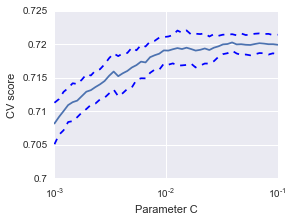

In [26]:

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.show()

In [31]:
C_val = C_s[scores.index(np.max(scores))]
print("Meilleure valeur de C = %.3f " % C_val)

Meilleure valeur de C = 0.039 


## 7 - Evaluation

In [35]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

svc = SVC(kernel='linear', C=C_val)
clf = svc.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print "    " + empty_cell,
    for label in labels: 
        print "%{0}s".format(columnwidth) % label,
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print "    %{0}s".format(columnwidth) % label1,
        for j in range(len(labels)): 
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print cell,
        print


In [36]:
cm = confusion_matrix(y_test, y_pred)
print_cm(cm, ["perdu","gagne"])

          perdu gagne
    perdu 3646.0 1514.0
    gagne 1396.0 3805.0


## 9 - Conclusions

* Le modèle prédictif n'est pas encore asses précis (~70%), il faut générer d'autres variables et évaluer le gain en précision qu'elles peuvent apporter.

* La plupart des variables qu'on a créés évaluent le macro management (économique), il y a de nombreuses variables à créer pour évaluer le micro management tel que le **scooting**, la **position des unités**, la **harcèlement** et le **contrôle des unités durant les batailles (focus fire, retreat units, dancing)**.

* Plusieurs modèles peuvent être combinés par la méthode des ensembles (averaging, boosting)

* Lorsque les prédictions seront suffisamment robustes, on les évaluera alors en fonction de la durée de jeu pour déterminer à partir de quand on peut déterminer l'issue du match.
